# 60201561 김아영

# 공휴일 전날과 식계 (중식, 석식) 분석

In [40]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns

In [5]:
plt.rc('font', family='NanumGothicBold') 

데이터 불러오기

In [6]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data=pd.concat([train, test], axis=0)

In [7]:
data=data.reset_index(drop=True)

In [8]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


출근자 수 칼럼 추가

In [9]:
data['출근자수']=data['본사정원수']-data['본사출장자수']-data['본사휴가자수']-data['현본사소속재택근무자수']

In [10]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0


공휴일 유무가 식수에 영향을 미칠 것이라고 예상하여 공휴일 전 날 칼럼 생성

공휴일 전날은 1, 공휴일 전날이 아닌 경우 0

In [12]:
data['공휴일전날']=0

data['공휴일전날'][4]=1 #'16 설연휴
data['공휴일전날'][17]=1 #삼일절
data['공휴일전날'][47]=1 #국회의원 선거
data['공휴일전날'][62]=1 #어린이날
data['공휴일전날'][67]=1 #석가탄신일
data['공휴일전날'][152]=1 #추석연휴
data['공휴일전날'][245]=1 #'17 설연휴
data['공휴일전날'][264]=1 #'17 삼일절
data['공휴일전날'][309]=1 # 석가탄신일
data['공휴일전날'][310]=1 #'17 어린이날
data['공휴일전날'][330]=1 #'17 현충일
data['공휴일전날'][379]=1 #'17 광복절
data['공휴일전날'][502]=1 #'18 설연휴
data['공휴일전날'][510]=1 #'18 삼일절
data['공휴일전날'][552]=1 #'18 근로자의 날
data['공휴일전날'][555]=1 #'18 어린이날
data['공휴일전날'][565]=1 #'18 석가탄신일
data['공휴일전날'][575]=1 #'18 현충일
data['공휴일전날'][579]=1 #'18 지방선거
data['공휴일전날'][623]=1 #'18 광복절
data['공휴일전날'][650]=1 #'18 추석연휴
data['공휴일전날'][651]=1 #'18 한글날
data['공휴일전날'][705]=1 #'18 성탄절
data['공휴일전날'][709]=1 #'19 신정
data['공휴일전날'][732]=1 #'19 설연휴
data['공휴일전날'][748]=1 #'19 삼일절
data['공휴일전날'][790]=1 #'19 근로자의 날
data['공휴일전날'][814]=1 #'19 현충일
data['공휴일전날'][863]=1 #'19 광복절
data['공휴일전날'][882]=1 #'19 추석연휴
data['공휴일전날'][894]=1 #'19 개천절
data['공휴일전날'][897]=1 #'19 한글날
data['공휴일전날'][951]=1 #'19 성탄절
data['공휴일전날'][955]=1 #'20 신정
data['공휴일전날'][971]=1 #'20 설연휴
data['공휴일전날'][995]=1 #'20 삼일절
data['공휴일전날'][1027]=1 #'20 국회의원선거
data['공휴일전날'][1037]=1 #'20 석가탄신일
data['공휴일전날'][1038]=1 #'20 어린이날
data['공휴일전날'][1061]=1 #'20 현충일
data['공휴일전날'][1099]=1 #'20 광복절
data['공휴일전날'][1129]=1 #'20 추석연휴
data['공휴일전날'][1133]=1 #'20 한글날
data['공휴일전날'][1187]=1 #'20 성탄절

data['공휴일전날'][1215]=1 #'21 설연휴
data['공휴일전날'][1225]=1 #'21 삼일절

중식계 시각화

<AxesSubplot:>

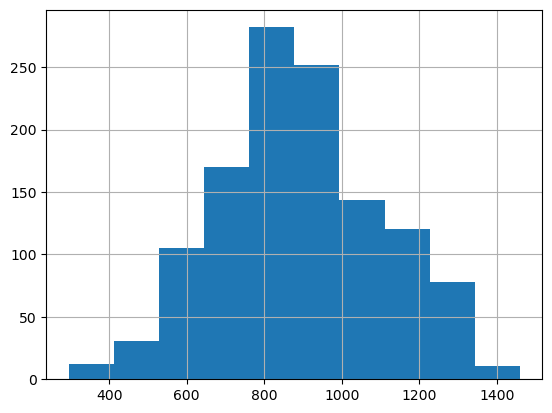

In [16]:
data['중식계'].hist()

석식계 시각화

<AxesSubplot:>

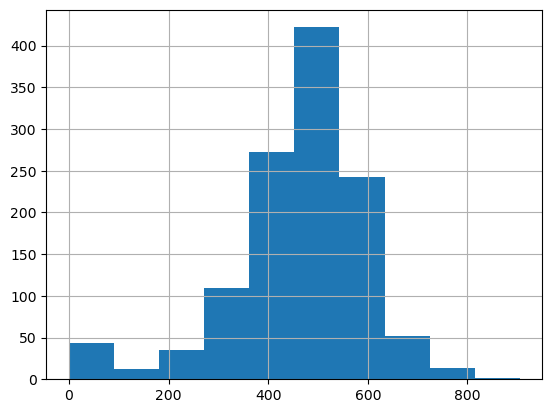

In [17]:
data['석식계'].hist()

공휴일 전날과 석식계 plot

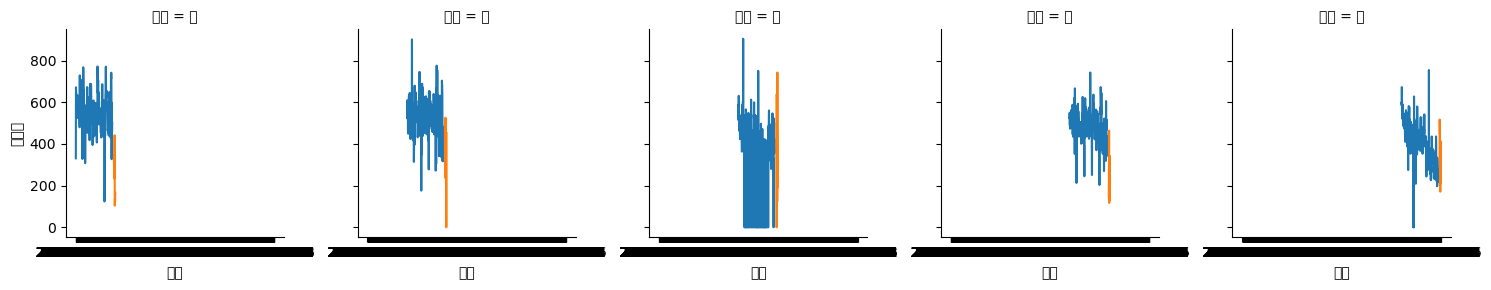

In [18]:
grid = sns.FacetGrid(data=data, col='요일', hue = '공휴일전날')
grid.map(plt.plot, '일자', '석식계')

공휴일 전날과 공휴일 전날이 아닌 경우를 나누어 data 처리

In [22]:
data_not_holiday=data[data['공휴일전날']==0]
data_holiday=data[data['공휴일전날']==1]

공휴일 전날 식계 데이터의 Missing Data를 평균 값으로 대체하여 Handling

In [47]:
data_holiday['석식계']=data_holiday['석식계'].fillna(data_holiday['석식계'].mean())

In [49]:
data_holiday['중식계']=data_holiday['중식계'].fillna(data_holiday['중식계'].mean())

In [62]:
data_not_holiday['석식계']=data_not_holiday['석식계'].fillna(data_not_holiday['석식계'].mean())

In [73]:
data_not_holiday['중식계']=data_not_holiday['중식계'].fillna(data_not_holiday['중식계'].mean())

In [74]:
data['석식계']=data['석식계'].fillna(data['석식계'].mean())

In [75]:
data['중식계']=data['중식계'].fillna(data['중식계'].mean())

공휴일 전날과 아닌 경우의 식계 평균 값 차이

In [64]:
data_holiday['중식계'].mean()

708.840909090909

In [65]:
data_not_holiday['중식계'].mean()

897.2127476313523

In [66]:
data_holiday['석식계'].mean()

308.9545454545455

In [67]:
data_not_holiday['석식계'].mean()

467.5641688199828

공휴일 전날에 중식계가 현저히 줄어든 것을 확인

공휴일 전날보다 공휴일 전날이 아닌 경우 중식계와 석식계의 값이 더 높게 확인된다

T-Test

In [68]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

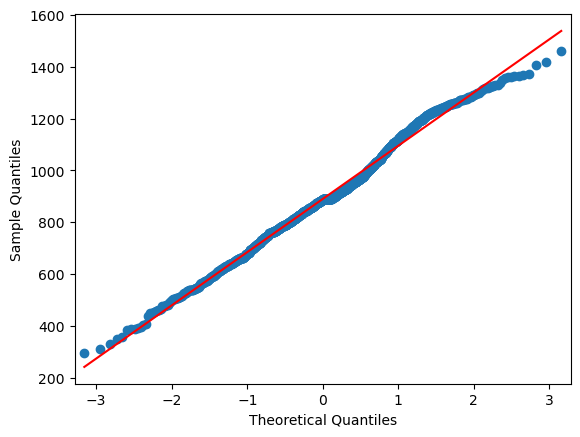

In [76]:
qqplot(data['중식계'], line='s')
plt.show()

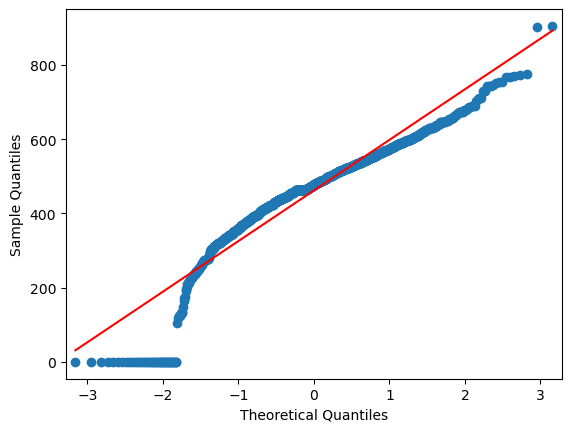

In [82]:
qqplot(data['석식계'], line='s')
plt.show()

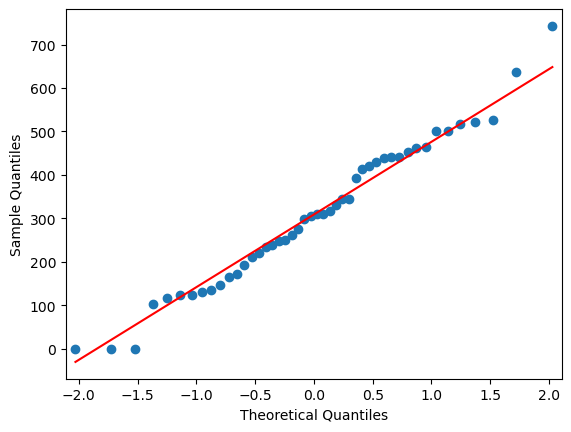

In [101]:
qqplot(data_holiday['석식계'], line='s')
plt.show()

Normality의 조건 만족 여부 검사

In [85]:
#Normality test

from scipy import stats
stats.normaltest(data['중식계'])

NormaltestResult(statistic=7.319149223049438, pvalue=0.025743461369261915)

In [89]:
#Normality test

from scipy import stats
stats.normaltest(data_not_holiday['중식계'])

NormaltestResult(statistic=13.397540065821282, pvalue=0.0012324268152589986)

In [90]:
#Normality test

from scipy import stats
stats.normaltest(data_holiday['중식계'])

NormaltestResult(statistic=0.9770905950951942, pvalue=0.6135182318243713)

In [106]:
#Normality test – Shapiro-Wilk Test

from scipy.stats import shapiro
shapiro(data['중식계'])

ShapiroResult(statistic=0.9921905398368835, pvalue=3.3686396818666253e-06)

T-Test 

In [105]:
from scipy import stats
stats.ttest_ind(data_holiday['중식계'], data_not_holiday['중식계'],equal_var=False)

Ttest_indResult(statistic=-6.437114784177162, pvalue=5.0268521252595556e-08)

공휴일 전날의 중식계와 공휴일 전날이 아닌 날의 중식계는 평균의 유의미한 차이를 보이는 것으로 판단하였다.

In [107]:
from scipy import stats
stats.ttest_ind(data_holiday['석식계'], data_not_holiday['석식계'],equal_var=False)

Ttest_indResult(statistic=-6.286242614413263, pvalue=9.832563261420216e-08)

공휴일 전날 석식계와 공휴일 전날이 아닌 날의 석식계의 경우 평균의 유의미한 차이가 존재한다고 판단하였다.

최종적으로 중식계와 석식계 모두 공휴일 전날에 식수의 합이 줄어드는 것을 수치적으로 확인 할 수 있으며 검정 상으로도 유의미한 차이가 존재함을 확인할 수 있다.